<a href="https://colab.research.google.com/github/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10/blob/main/experiments/train_ncns_achi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Env**

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10.git

# **Imports**

In [2]:
# Imports
import sys
import os
import torch
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.utils import make_grid

# Add the root directory of the cloned repository to the Python path
sys.path.append('/content/Comparative-analysis-of-Generative-models-on-CIFAR-10')

import importlib
import data.cifar10 as cifar10_module
import utils.checkpointer as checkpointer_module
import train.train as train_module
import models.VAE_models.conv_vae as conv_vae_module
import samplers.vae_sampler as vae_sampler_module
import utils.weight_init as weight_module
import models.VAE_models.vqvae as vqvae_module
import models.VAE_models.pixelcnn as pixelcnn_module
import models.VAE_models.mmdvae as mmdvae_module
import models.VAE_models.ncsn as ncsn_module
importlib.reload(cifar10_module)
importlib.reload(checkpointer_module)
importlib.reload(train_module)
importlib.reload(conv_vae_module)
importlib.reload(vae_sampler_module)
importlib.reload(weight_module)
importlib.reload(vqvae_module)
importlib.reload(pixelcnn_module)
importlib.reload(mmdvae_module)
importlib.reload(ncsn_module)
from data.cifar10 import load_cifar10
from utils.checkpointer import Checkpointer
from train.train import Train
from models.VAE_models.conv_vae import ConvVAE
from samplers.vae_sampler import vae_sample
from utils.weight_init import WeightsInitializer
from models.VAE_models.vqvae import VQVAE
from models.VAE_models.pixelcnn import PixelCNN
from models.VAE_models.mmdvae import MMDVAE
from models.VAE_models.ncsn import NCSN

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
train_loader, _ = load_cifar10(batch_size=128)

100%|██████████| 170M/170M [00:04<00:00, 42.2MB/s]


In [ ]:
# img = train[0][1]

In [4]:
import matplotlib.pyplot as plt
from torchvision import transforms

# Convert to HWC for plotting
def show_img(img):
    if img.dim() == 4:
        img = img[0]

    img = img.detach().cpu().clamp(0, 1)
    img = img.permute(1, 2, 0)  # CHW -> HWC

    h, w, _ = img.shape
    dpi = 100  # matplotlib default

    # plt.figure(figsize=(w / dpi, h / dpi), dpi=dpi)
    # plt.imshow(img, interpolation='none')  # <- critical

    plt.figure(figsize=(2, 2))
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [41]:
model = NCSN(lr=1e-4*0.90).to(device)

In [51]:
checkpoint_dir = "/content/drive/MyDrive/checkpoints_final/ncsn"
checkpointer = Checkpointer(checkpoint_dir, "NCSN", 1, False)
train = Train(model, 200, train_loader, checkpointer, device)
train.load_checkpoint(112)
# train.train()

Loaded checkpoint for epoch 112: /content/drive/MyDrive/checkpoints_final/ncsn/NCSN_epoch_112.pt


In [52]:
train.epoch_losses

[{'loss': 933.5923541525136},
 {'loss': 630.2901015806076},
 {'loss': 478.0474400825208},
 {'loss': 418.51522608608235},
 {'loss': 392.5099724576906},
 {'loss': 379.2362083181396},
 {'loss': 366.6318054979719},
 {'loss': 359.8543687122862},
 {'loss': 353.5049354962986},
 {'loss': 348.6479809070792},
 {'loss': 345.20085616245905},
 {'loss': 341.2160477504096},
 {'loss': 337.0548737274716},
 {'loss': 335.93377427981636},
 {'loss': 332.6024701442865},
 {'loss': 330.79068914154914},
 {'loss': 327.41690445921915},
 {'loss': 329.10690479327343},
 {'loss': 321.515493719779},
 {'loss': 322.06543561930545},
 {'loss': 319.5446154504176},
 {'loss': 317.8842735973465},
 {'loss': 319.2197108744355},
 {'loss': 317.15049985607567},
 {'loss': 314.839128655241},
 {'loss': 315.96211004623063},
 {'loss': 315.02572284513116},
 {'loss': 313.8708966345433},
 {'loss': 311.7126662310432},
 {'loss': 311.5211969165851},
 {'loss': 309.50336337272466},
 {'loss': 309.78888079943255},
 {'loss': 310.8805986097097},


In [47]:
gen_img = model.sample(10)

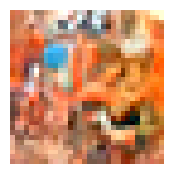

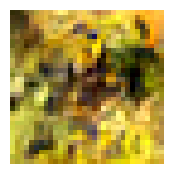

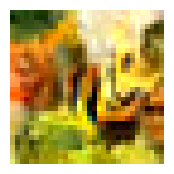

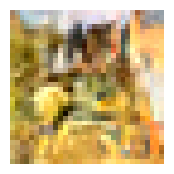

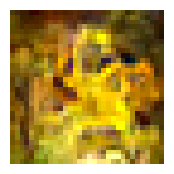

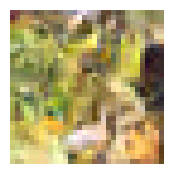

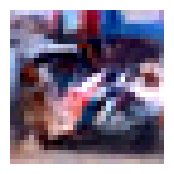

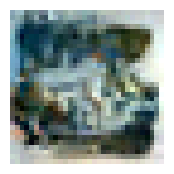

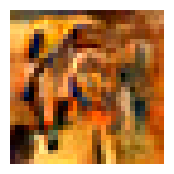

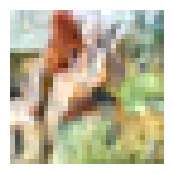

In [48]:
for i in range(len(gen_img)):
  show_img(gen_img[i])